In [4]:
import pandas as pd
import numpy as np

In [6]:
#Using DataFrame created from web scraping. Furthur Data exploration and wrangling is done 
df = pd.read_csv("KingsOfNepal.csv")

df#.drop(columns=["Unnamed: 0"], inplace=True)

,Names,Birthday,Reignend,ReignStart,ReignSpan,Age
0,Prithvi Narayan Shah,1723-01-07,1775-01-11,1768-09-25,6.294448,52.012019
1,Pratap Singh Shah,1751-04-16,1777-11-17,1775-01-11,2.850161,26.590553
2,Rana Bahadur Shah,1775-05-25,1799-03-08,1777-11-17,21.303654,23.786936
3,Girvan Yuddha Bikram Shah,1797-10-19,1816-11-20,1799-03-08,17.703307,19.085950
4,Rajendra Bikram Shah,1813-12-03,1847-05-12,1816-11-20,30.472905,33.438058
5,Surendra Bikram Shah,1829-10-20,1881-05-17,1847-05-12,34.015757,51.573954
6,Prithvi Bir Bikram Shah,1875-08-18,1911-12-11,1881-05-17,30.565994,36.312861
7,Tribhuvan Bir Bikram Shah(1st reign),1906-06-30,1950-11-07,1911-12-11,38.908396,44.356831
8,Gyanendra Bir Bikram Shah(1st reign),1946-07-07,1951-01-07,1950-11-07,0.167012,4.503857
9,Tribhuvan Bir Bikram Shah(2nd reign),1906-06-30,1955-03-13,1951-01-07,4.178046,48.701890


In [7]:
#Converting object types to datetime for calculation of the number of days

df["Birthday"] = pd.to_datetime(df["Birthday"])
df["ReignStart"] = pd.to_datetime(df["ReignStart"])
df["Reignend"] = pd.to_datetime(df["Reignend"])

In [8]:
#calculating the number of days each kings ruled
df['ReignDays'] = df["Reignend"] - df["ReignStart"]

In [9]:
#Adding a new column ReignDays to df. (.dt.days is added so that the dataframe only shows int)
df["ReignDays"] = df["ReignDays"].dt.days

In [10]:
#Rounding off Age and Reign Span columns
df['ReignSpan'] = df['ReignSpan'].apply(lambda x: round(x), 2)
df['Age'] = df['Age'].apply(lambda x: round(x), 2)


In [11]:
#Removing (1st reign and 2nd reign from df["Names"])
df["Names"] = df["Names"].str.split("(", expand = True).iloc[:,0]

In [12]:
#df["Names"] = df["Names"].str.replace(r"13","")
df["Names"] = df["Names"].str.split("[", expand = True).iloc[:,0]

In [13]:
df

,Names,Birthday,Reignend,ReignStart,ReignSpan,Age,ReignDays
0,Prithvi Narayan Shah,1723-01-07,1775-01-11,1768-09-25,6,52,2299
1,Pratap Singh Shah,1751-04-16,1777-11-17,1775-01-11,3,27,1041
2,Rana Bahadur Shah,1775-05-25,1799-03-08,1777-11-17,21,24,7781
3,Girvan Yuddha Bikram Shah,1797-10-19,1816-11-20,1799-03-08,18,19,6466
4,Rajendra Bikram Shah,1813-12-03,1847-05-12,1816-11-20,30,33,11130
5,Surendra Bikram Shah,1829-10-20,1881-05-17,1847-05-12,34,52,12424
6,Prithvi Bir Bikram Shah,1875-08-18,1911-12-11,1881-05-17,31,36,11164
7,Tribhuvan Bir Bikram Shah,1906-06-30,1950-11-07,1911-12-11,39,44,14211
8,Gyanendra Bir Bikram Shah,1946-07-07,1951-01-07,1950-11-07,0,5,61
9,Tribhuvan Bir Bikram Shah,1906-06-30,1955-03-13,1951-01-07,4,49,1526


In [21]:
#Copying data into a csv file
df.to_csv('ShahKingsofNepal', index = False)

In [15]:
#Using groupby to calculate total number of days ruled by the Kings, Since there were two terms for the two of the Kings
kings = df.groupby("Names").ReignDays.sum()


In [16]:
Kings = kings.sort_values()


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

 Plotting the number of days spent in power for every Kings

In [18]:
df

,Names,Birthday,Reignend,ReignStart,ReignSpan,Age,ReignDays
0,Prithvi Narayan Shah,1723-01-07,1775-01-11,1768-09-25,6,52,2299
1,Pratap Singh Shah,1751-04-16,1777-11-17,1775-01-11,3,27,1041
2,Rana Bahadur Shah,1775-05-25,1799-03-08,1777-11-17,21,24,7781
3,Girvan Yuddha Bikram Shah,1797-10-19,1816-11-20,1799-03-08,18,19,6466
4,Rajendra Bikram Shah,1813-12-03,1847-05-12,1816-11-20,30,33,11130
5,Surendra Bikram Shah,1829-10-20,1881-05-17,1847-05-12,34,52,12424
6,Prithvi Bir Bikram Shah,1875-08-18,1911-12-11,1881-05-17,31,36,11164
7,Tribhuvan Bir Bikram Shah,1906-06-30,1950-11-07,1911-12-11,39,44,14211
8,Gyanendra Bir Bikram Shah,1946-07-07,1951-01-07,1950-11-07,0,5,61
9,Tribhuvan Bir Bikram Shah,1906-06-30,1955-03-13,1951-01-07,4,49,1526


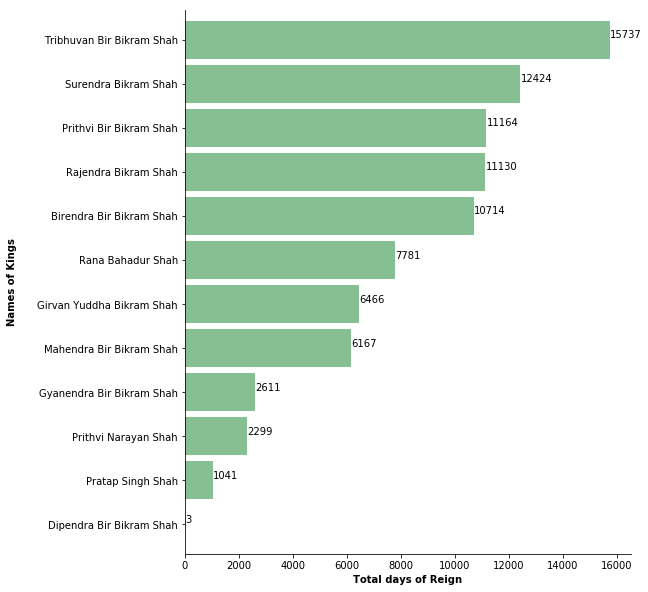

In [19]:
ax = Kings.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.set_ylabel("Names of Kings", weight='bold', labelpad=20)
ax.set_xlabel("Total days of Reign", weight='bold')


for i, v in enumerate(Kings):
    ax.text(v + 3, i + .045, str(v), color='black')


Timeline of Rule in chronological order

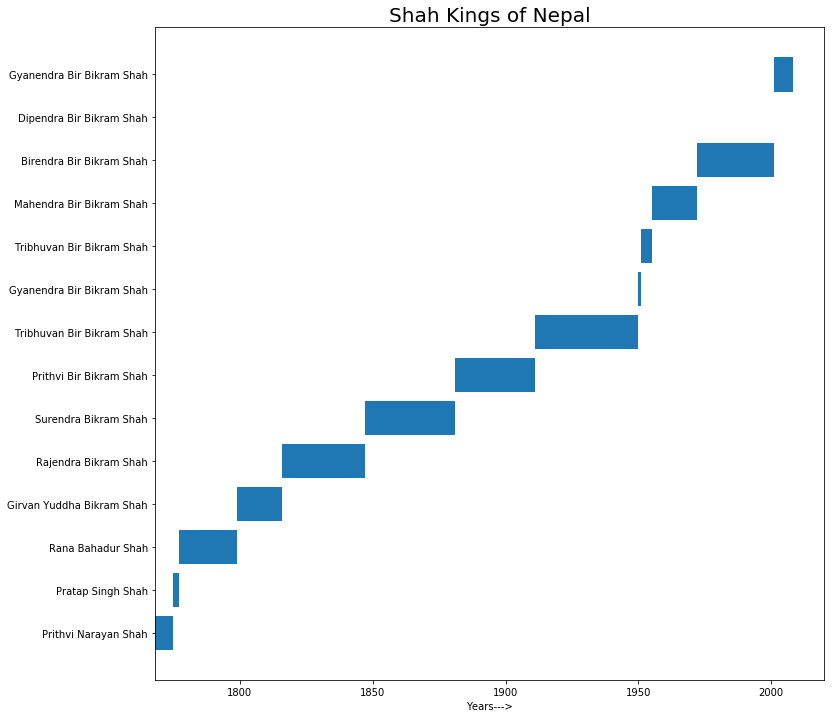

In [20]:

begin = df["ReignStart"].dt.year.values

end =   df["Reignend"].dt.year.values
event = df["Names"].values
begin_sort = np.sort(begin)
end_sort = end[np.argsort(begin)]
plt.figure(figsize=(12,12))

plt.barh(range(len(begin)),  end-begin, left=begin, align='center')
plt.title('Shah Kings of Nepal', fontsize = '20')
plt.yticks(range(len(begin)), event)
plt.xlabel("Years--->")

plt.show()